In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
capaEntrada = tf.keras.layers.Dense(units=7, input_shape=[7])

modelo = tf.keras.Sequential([capaEntrada])

modelo.add(tf.keras.layers.Dense(units=(16), activation='relu'))
modelo.add(tf.keras.layers.Dense(units=(32), activation='relu'))
modelo.add(tf.keras.layers.Dense(units=(64), activation='relu'))
modelo.add(tf.keras.layers.Dense(units=(128), activation='relu'))
#modelo.add(tf.keras.layers.Dense(units=(256), activation='relu'))
#modelo.add(tf.keras.layers.Dense(units=(128), activation='relu'))
modelo.add(tf.keras.layers.Dense(units=(64), activation='relu'))
modelo.add(tf.keras.layers.Dense(units=(32), activation='relu'))
modelo.add(tf.keras.layers.Dense(units=(16), activation='relu'))

capaSalida = tf.keras.layers.Dense(units=7)

modelo.add(capaSalida)

tf.keras.backend.set_epsilon(1)

print(modelo.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 16)                128       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=3e-3),
    loss="mse",
    metrics=[tf.keras.metrics.MeanAbsolutePercentageError()]
)

In [ ]:
inputURL = ''
outputURL = ''
if inputURL == '' or outputURL == '':
    print('ERROR: INTRODUZCA LAS RUTAS DE LOS DATASET')
else:
    input = open(inputURL ,'r')
    output = open(outputURL,'r')

In [ ]:
readed = input.readline().replace('\n', '').split(';')

entreno = []

while readed != ['']:

  readed = [float(i) for i in readed]

  entreno.append(readed)

  readed = input.readline().replace('\n', '').split(';')

print(len(entreno))

4068


In [ ]:
readed = output.readline().replace('\n', '').split(';')

salidaEntreno = []

while readed != ['']:

  readed = [float(i) for i in readed]

  salidaEntreno.append(readed)

  readed = output.readline().replace('\n', '').split(';')

print(salidaEntreno)

[[0.02339320701525256, 2.498087713071396, -0.3992185000471789, -0.947233136519243, -0.23853401251618184, -0.07861651537912745, 0.24045148850103862], [0.02339320701525256, 2.498854703465339, -0.3984515096532362, -0.9480001269131857, -0.23930100291012454, -0.07784952498518474, 0.23930100291012454], [0.024160197409195266, 2.4973207226774536, -0.3976845192592935, -0.947233136519243, -0.23930100291012454, -0.0782330201821561, 0.24045148850103862], [0.024160197409195266, 2.497704217874425, -0.3980680144562649, -0.9480001269131857, -0.2389175077131532, -0.0782330201821561, 0.2396844981070959], [0.024160197409195266, 2.4984712082683678, -0.3984515096532362, -0.9480001269131857, -0.2389175077131532, -0.0782330201821561, 0.24045148850103862], [0.023776702212223912, 2.498854703465339, -0.3980680144562649, -0.947233136519243, -0.2381505173192105, -0.0782330201821561, 0.24045148850103862], [0.023776702212223912, 2.497704217874425, -0.3984515096532362, -0.947233136519243, -0.23853401251618184, -0.07

In [ ]:
print("Comenzando entreno y validacion")

historial = modelo.fit(np.array(entreno),
                       np.array(salidaEntreno),
                       epochs=1500,
                       validation_split=0.2,
                       shuffle=True,
                       #batch_size=50,
                       use_multiprocessing=True,
                       #steps_per_epoch=50
                        )

print('Modelo entrenado y validado')

Comenzando entreno y validacion
Epoch 1/1500
102/102 [==============================] - 2s 7ms/step - loss: 0.4735 - mean_absolute_percentage_error: 47.8987 - val_loss: 0.3181 - val_mean_absolute_percentage_error: 43.1277
Epoch 2/1500
102/102 [==============================] - 0s 4ms/step - loss: 0.2786 - mean_absolute_percentage_error: 35.6357 - val_loss: 0.1861 - val_mean_absolute_percentage_error: 33.5446
Epoch 3/1500
102/102 [==============================] - 0s 4ms/step - loss: 0.1791 - mean_absolute_percentage_error: 28.1231 - val_loss: 0.1313 - val_mean_absolute_percentage_error: 27.9470
Epoch 4/1500
102/102 [==============================] - 0s 4ms/step - loss: 0.1401 - mean_absolute_percentage_error: 24.9347 - val_loss: 0.1166 - val_mean_absolute_percentage_error: 25.6562
Epoch 5/1500
102/102 [==============================] - 0s 3ms/step - loss: 0.1282 - mean_absolute_percentage_error: 23.6719 - val_loss: 0.1123 - val_mean_absolute_percentage_error: 24.5732
Epoch 6/1500
102/1

[0.9319739478567954, 0.5498288122817989, -0.05312169430081522, -0.11660415246233549, 0.973419338103683, 0.1465277229038127, 0.13186314972330873]
[0.3186845086831947, 0.4801359866081345, -0.6761020322604961, -0.21552430069790063, -0.022626216621309852, 1.0369710126105396, -0.0897378760912967]
1/1 [==============================] - 0s 148ms/step
[0.4045949, 0.3728215, -0.6494285, -0.14970034, -0.22182366, 1.1301754, -0.11857596]


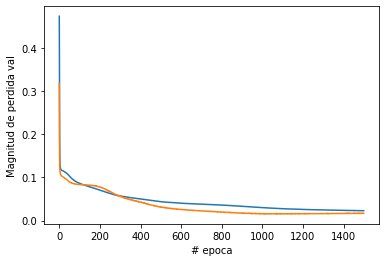

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('# epoca')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])

plt.xlabel('# epoca')
plt.ylabel('Magnitud de perdida val')
plt.plot(historial.history['val_loss'])

print(entreno[124])
print(salidaEntreno[124])

predicho = modelo.predict([entreno[124]])[0]

print(list(predicho))

In [ ]:
modelo.save('/content/drive/MyDrive/TFG/Datos/pesosBaxter.h5')